# Group 29 Project Proposal: An Investigation of Distinguishing the Presence and Absence of Heart Disease

## Introduction:
Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal

According to the Centers for Disease Control and Prevention, heart disease is any type of condition that affects the structure or function of the heart often caused by high blood pressure, high cholestorol, or smoking. In the United States of America, heart disease-related complications (e.g. heart attacks) are the leading cause of death - averaging around 659,000 deaths each year, which is roughly 1 in 4 deaths.

I posit the question: "<b>How accurate is KNN classification at detecting the presence of heart disease?</b>" to investigate the key factors behind heart disease using a <i>K-nearest neighbors algorithm</i> on the <i>Heart Disease Data Set</i> donated by David W. Aha. This dataset contains 14 variables and 303 observations. The column names are listed below:

1. Age
2. Sex (1 = male, 0 = female)
3. Chest Pain Type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptomatic)
4. Resting Blood Pressure (mm Hg)
5. Serum Cholestorol (mg/dl)
6. Fasting Blood Sugar > 120 mg/dl (1 = true; 0 = false)
7. Resting Electrocardiographic Results (0 = normal; 1 = having ST-T wave abnormality; 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria) 
8. Maximum Heart Rate Achieved (bpm)
9. Exercised Induced Angina (1 = yes; 0 = no)
10. ST Depression induced by exercise relative to rest
    - a measure of a portion of an electrocardiogram reading
11. The slope of the peak exercise ST segment (1 = upsloping; 2 = flat; 3 = downsloping)
12. The number of major vessels (0 - 3) colored by fluoroscopy 
13. Thalassemia Blood Disorder (3 = normal; 6 = fixed defect; 7 = reversable defect)
    - this disorder causes red blood cells to carry less oxygen to the heart
14. Diagnosis of Heart Disease (1 = presence; 0 = absence) 

## Preliminary Exploratory Data Analysis

In [2]:
library(tidyverse)
library(tidymodels)
# for data reproducibility
set.seed(3)

First, I upload and load the data file into Jupyter Notebook as a R data frame. This data is relatively tidy as each column contains a single variable, each row contains a single observation, and each cell contains a single measurement. 

However, I perform some wrangling improvements:
- Adding column names for each variable
- Converting values > 1 in the diagnosis column to be 1 (as specified in the dataset's notes)
- Converting the diagnosis variable to be of factor data type
- Converting the diagnosis variable values (0, 1) to be replaced by "<b>Absence</b>" and "<b>Presence</b>" respectively
- Converting the major_vessels and thal variables to be of numeric data type
- Removing 6 observations with missing data

In [14]:
heart_disease <- read_csv("data/processed.cleveland.data",
                          col_names = c("age", "sex", "chest_pain_type", "resting_blood_pressure", "cholestorol", "fasting_blood_sugar", "electrocardio_results", "max_heart_rate", "exercise_induced_angina", "ST_depression", "ST_peak_slope", "major_vessels", "thal", "diagnosis"))

heart_disease <- heart_disease %>%
    mutate(major_vessels = as.numeric(major_vessels)) %>%
    mutate(thal = as.numeric(thal)) 

heart_disease <- heart_disease %>%
    mutate(diagnosis = as.factor(ifelse(diagnosis == 0, "Absence", "Presence")))

heart_disease <- na.omit(heart_disease)

heart_disease

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  chest_pain_type = col_double(),
  resting_blood_pressure = col_double(),
  cholestorol = col_double(),
  fasting_blood_sugar = col_double(),
  electrocardio_results = col_double(),
  max_heart_rate = col_double(),
  exercise_induced_angina = col_double(),
  ST_depression = col_double(),
  ST_peak_slope = col_double(),
  major_vessels = col_character(),
  thal = col_character(),
  diagnosis = col_double()
)

Warning message:
“Problem with `mutate()` input `major_vessels`.
ℹ NAs introduced by coercion
ℹ Input `major_vessels` is `as.numeric(major_vessels)`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”
Warning message:
“Problem with `mutate()` input `thal`.
ℹ NAs introduced by coercion
ℹ Input `thal` is `as.numeric(thal)`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”


age,sex,chest_pain_type,resting_blood_pressure,cholestorol,fasting_blood_sugar,electrocardio_results,max_heart_rate,exercise_induced_angina,ST_depression,ST_peak_slope,major_vessels,thal,diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,Absence
67,1,4,160,286,0,2,108,1,1.5,2,3,3,Presence
67,1,4,120,229,0,2,129,1,2.6,2,2,7,Presence
37,1,3,130,250,0,0,187,0,3.5,3,0,3,Absence
41,0,2,130,204,0,2,172,0,1.4,1,0,3,Absence
56,1,2,120,236,0,0,178,0,0.8,1,0,3,Absence
62,0,4,140,268,0,2,160,0,3.6,3,2,3,Presence
57,0,4,120,354,0,0,163,1,0.6,1,0,3,Absence
63,1,4,130,254,0,2,147,0,1.4,2,1,7,Presence


The data is then split into training and testing data. 

In [15]:
heart_disease_split <- initial_split(heart_disease, prop = 0.8, strata = diagnosis)
heart_disease_train <- training(heart_disease_split)
heart_disease_test <- testing(heart_disease_split)

### Number of Observations Per Class

In [16]:
heart_disease_proportions <- heart_disease_train %>%
    group_by(diagnosis) %>%
    summarize(n = n()) %>%
    mutate(percent = 100 * n / nrow(heart_disease_train))

heart_disease_proportions

`summarise()` ungrouping output (override with `.groups` argument)



diagnosis,n,percent
<fct>,<int>,<dbl>
Absence,129,53.9749
Presence,110,46.0251


### Mean Predictor Values

In [17]:
heart_disease_predictors <- heart_disease_train %>%
    select(age, sex, chest_pain_type, resting_blood_pressure, cholestorol, max_heart_rate, thal) %>%
    map_df(mean)

heart_disease_predictors

age,sex,chest_pain_type,resting_blood_pressure,cholestorol,max_heart_rate,thal
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
54.65272,0.6527197,3.146444,132.4393,248.2636,149.4477,4.711297


### Number of Missing Observations
- NOTE: I removed all the missing observations in the original dataset as part of my wrangling process.

In [18]:
naCols <- colSums(is.na(heart_disease_train))

print(naCols)

                    age                     sex         chest_pain_type 
                      0                       0                       0 
 resting_blood_pressure             cholestorol     fasting_blood_sugar 
                      0                       0                       0 
  electrocardio_results          max_heart_rate exercise_induced_angina 
                      0                       0                       0 
          ST_depression           ST_peak_slope           major_vessels 
                      0                       0                       0 
                   thal               diagnosis 
                      0                       0 


### Visualizations
For my first visualization, I visualize the proportion of heart disease diagnosis within males and females. 

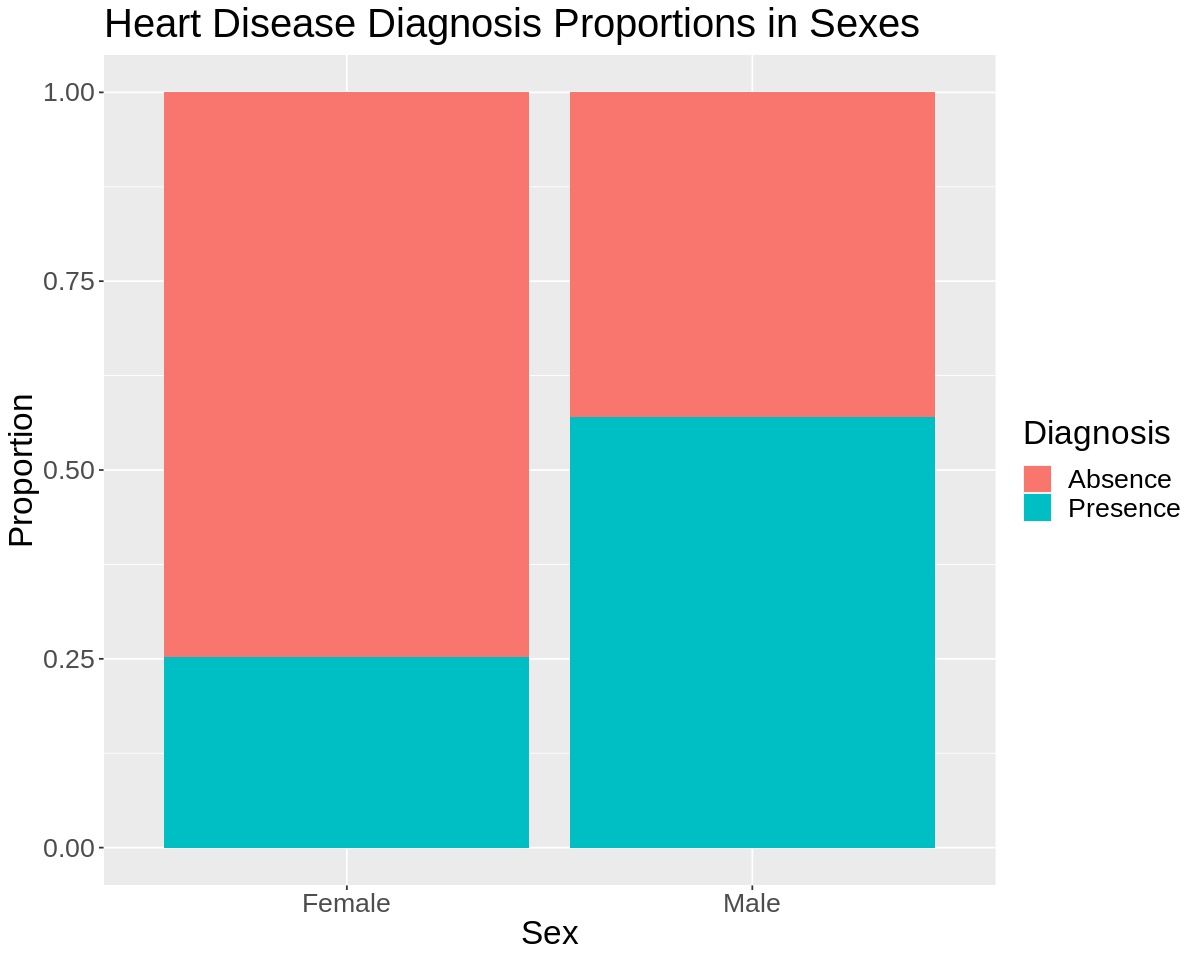

In [19]:
sex_diagnosis_plot <- heart_disease_train %>%
    mutate(sex = as.factor(ifelse(sex == 1, "Male", "Female"))) %>%
    ggplot(aes(x = sex, fill = diagnosis)) +
        geom_bar(position = "fill") + 
        labs(x = "Sex", y = "Proportion", fill = "Diagnosis") + 
        ggtitle("Heart Disease Diagnosis Proportions in Sexes") +
        theme(text = element_text(size = 20))

sex_diagnosis_plot

Here, I am comparing maximum heart rate with age. 

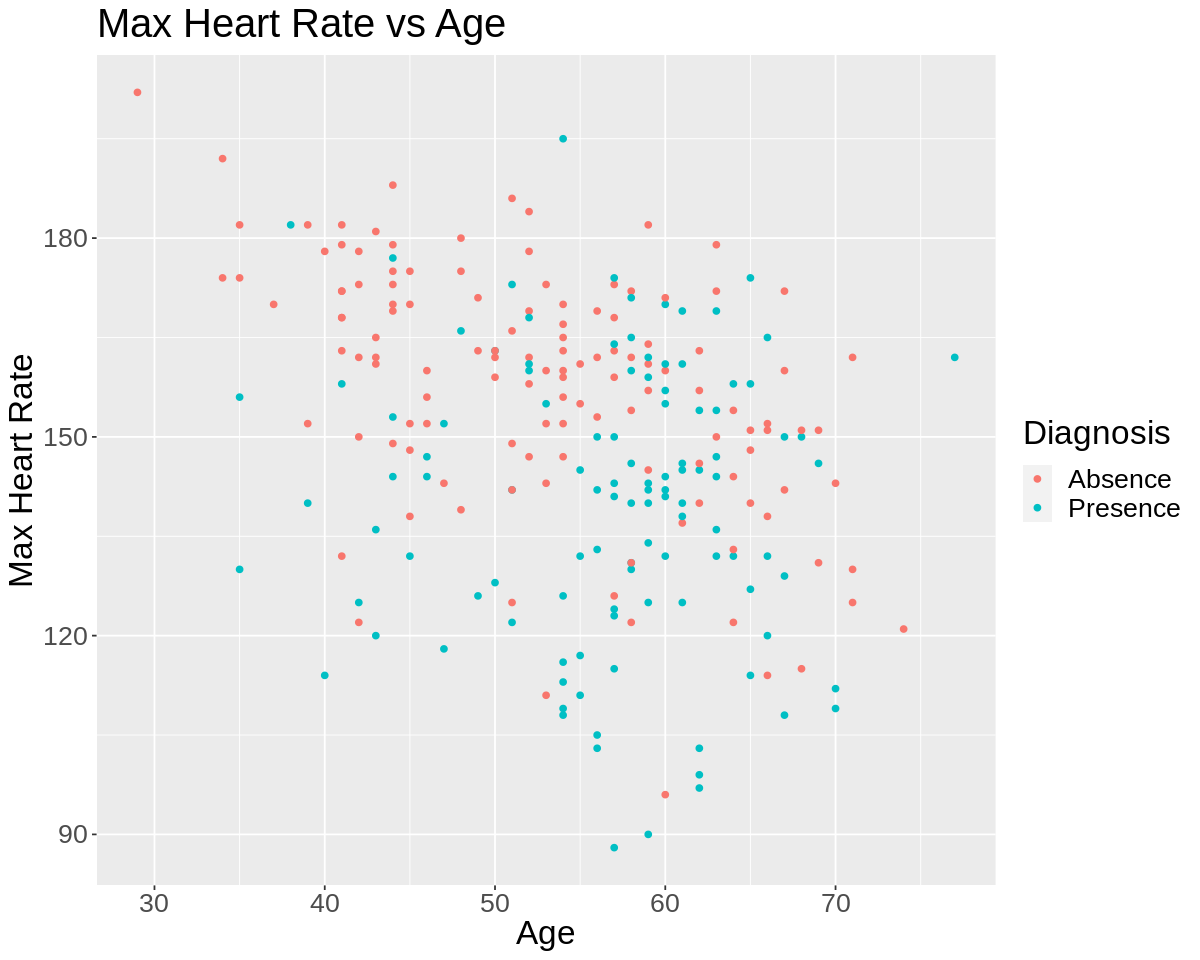

In [20]:
blood_sugar_heart_rate_plot <- heart_disease_train %>%
    ggplot(aes(x = age, y = max_heart_rate, color = diagnosis)) +
        geom_point() + 
        labs(x = "Age", y = "Max Heart Rate", color = "Diagnosis") + 
        ggtitle("Max Heart Rate vs Age") +
        theme(text = element_text(size = 20))

blood_sugar_heart_rate_plot

This visualization compares cholestorol with resting blood pressure. Healthy blood pressure should be < 120 mm Hg and healthy cholestorol levels should be < 200 mg/dl according to the Centers for Disease Control and Prevention.   

Warning message:
“Removed 3 rows containing missing values (geom_point).”


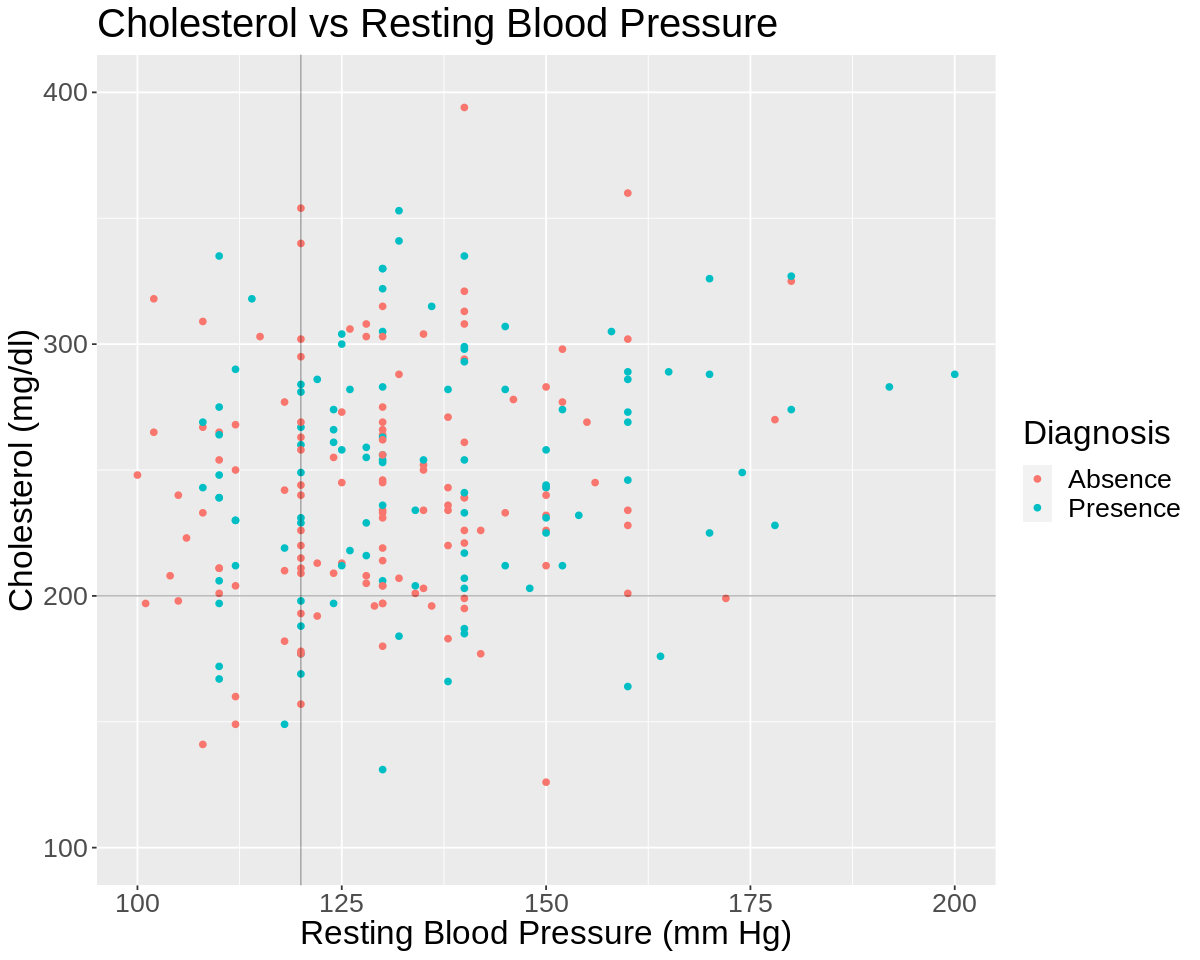

In [22]:
options(repr.plot.width = 10, repr.plot.height = 8)

heart_disease_plot <- heart_disease_train %>%
    ggplot(aes(x = resting_blood_pressure, y = cholestorol, color = diagnosis)) +
        geom_point() +
        labs(x = "Resting Blood Pressure (mm Hg)", y = "Cholesterol (mg/dl)", color = "Diagnosis") +
        theme(text = element_text(size = 20)) + 
        ggtitle("Cholesterol vs Resting Blood Pressure") +
        geom_hline(yintercept = 200, linetype = "solid", size = 0.25, alpha = 0.5) +
        geom_vline(xintercept = 120, linetype = "solid", size = 0.25, alpha = 0.5) +
        ylim(100, 400) 
# ylim limits y-axis values, excluding some outliers

heart_disease_plot

This visualization shows the proportion of heart disease diagnosis with thalassemia defect categories. 

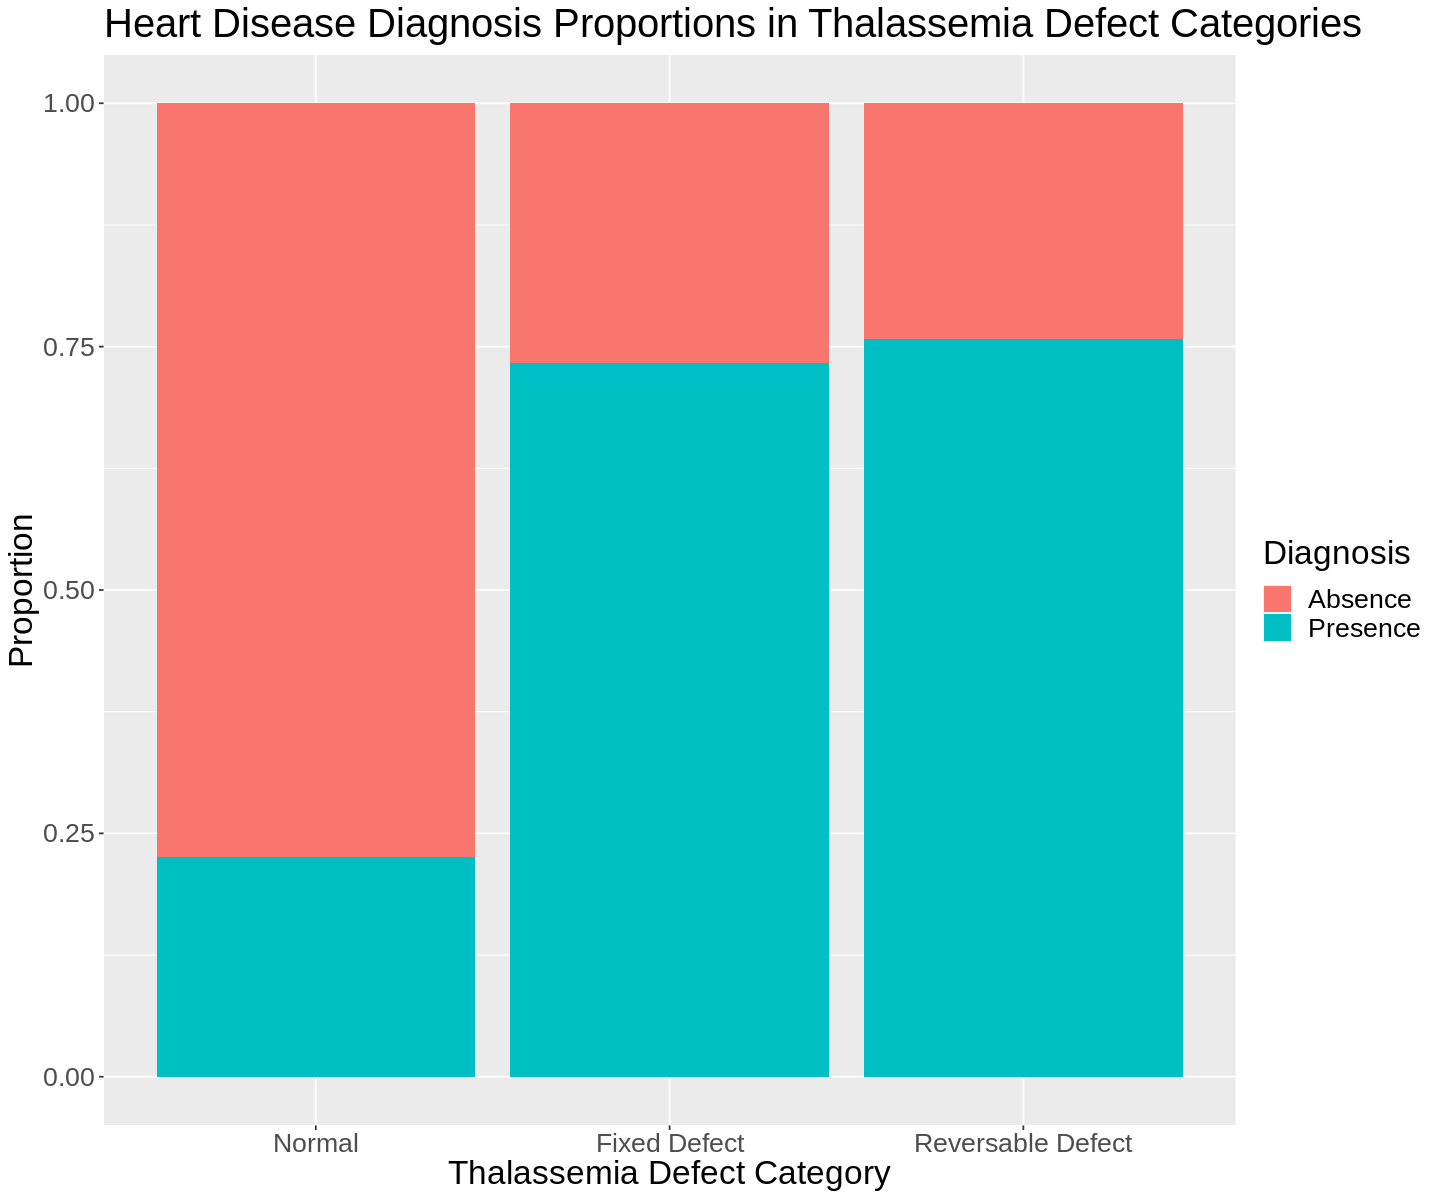

In [23]:
options(repr.plot.width = 12, repr.plot.height = 10)

heart_disease_thal <- heart_disease_train %>%
    mutate(thal = as.factor(thal))

# converts factor level labels 
levels(heart_disease_thal$thal) <- c(`3` = "Normal", `6` = "Fixed Defect", `7` = "Reversable Defect")

thal_diagnosis_plot <- heart_disease_thal %>%
    ggplot(aes(x = thal, fill = diagnosis)) +
        geom_bar(position = "fill") + 
        labs(x = "Thalassemia Defect Category", y = "Proportion", fill = "Diagnosis") + 
        ggtitle("Heart Disease Diagnosis Proportions in Thalassemia Defect Categories") +
        theme(text = element_text(size = 20))

thal_diagnosis_plot

## Methods

Now, I will choose my predictors using the forward selection method to preserve relevant predictors that will produce an accurate model. Based on the results, I will choose seven predictors because the row with int = 7 tends to have one of the higher estimated accuracies (around 85%) and also experiences the least amount of fluctuations in the accuracy because the rows above and below differ by only 1-2%. Choosing seven predictors (the median of 14 variables) also decreases the risk of overfitting or underfitting. With the recommendations of the algorithm and my own logical reasoning, the predictors I will choose are <b>age, sex, chest_pain_type, resting_blood_pressure, cholestorol, max_heart_rate, and thal</b>. These predictors are mostly quantitative and are the most meaningful to the average person who may not have as much medical knowldge as a professional. 

To conduct the K-nearest neighbors classification analysis to determine the presence or absence of heart disease from inference, my method is as follows:
1. Read, clean, and wrangle the data.
2. Split the data into training and test sets.
3. Perform 5-fold cross validation. 
4. Create a K-nearest neighbors recipe, model specification, and workflow. 
5. Tune the model to estimate and choose a K value with a high classifier accuracy. 
6. Fit the model onto the testing data. 
7. Evaluate the estimated accuracy of the classifier using <i>predict()</i> and <i>collect_metrics()</i>. 

In [115]:
names <- colnames(heart_disease %>% select(-diagnosis))

# create an empty tibble to store the results
accuracies <- tibble(size = integer(), 
                     model_string = character(), 
                     accuracy = numeric())

# create a model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) %>%
     set_engine("kknn") %>%
     set_mode("classification")

# create a 5-fold cross-validation object
heart_disease_vfold <- vfold_cv(heart_disease, v = 5, strata = diagnosis)

# store the total number of predictors
n_total <- length(names)

# stores selected predictors
selected <- c()

# for every size from 1 to the total number of predictors
for (i in 1:n_total) {
    # for every predictor still not added yet
    accs <- list()
    models <- list()
    for (j in 1:length(names)) {
        # create a model string for this combination of predictors
        preds_new <- c(selected, names[[j]])
        model_string <- paste("diagnosis", "~", paste(preds_new, collapse="+"))

        # create a recipe from the model string
        heart_disease_recipe <- recipe(as.formula(model_string), 
                                data = heart_disease) %>%
                          step_scale(all_predictors()) %>%
                          step_center(all_predictors())

        # tune the KNN classifier with these predictors, 
        # and collect the accuracy for the best K
        acc <- workflow() %>%
          add_recipe(heart_disease_recipe) %>%
          add_model(knn_spec) %>%
          tune_grid(resamples = heart_disease_vfold, grid = 10) %>%
          collect_metrics() %>%
          filter(.metric == "accuracy") %>%
          summarize(mx = max(mean))
        acc <- acc$mx %>% unlist()

        # add this result to the dataframe
        accs[[j]] <- acc
        models[[j]] <- model_string
    }
    jstar <- which.max(unlist(accs))
    accuracies <- accuracies %>% 
      add_row(size = i, 
              model_string = models[[jstar]], 
              accuracy = accs[[jstar]])
    selected <- c(selected, names[[jstar]])
    names <- names[-jstar]
}

accuracies

size,model_string,accuracy
<int>,<chr>,<dbl>
1,diagnosis ~ thal,0.7642373
2,diagnosis ~ thal+major_vessels,0.7876836
3,diagnosis ~ thal+major_vessels+chest_pain_type,0.8450847
4,diagnosis ~ thal+major_vessels+chest_pain_type+age,0.8351977
5,diagnosis ~ thal+major_vessels+chest_pain_type+age+exercise_induced_angina,0.8555932
6,diagnosis ~ thal+major_vessels+chest_pain_type+age+exercise_induced_angina+fasting_blood_sugar,0.8521469
7,diagnosis ~ thal+major_vessels+chest_pain_type+age+exercise_induced_angina+fasting_blood_sugar+max_heart_rate,0.8519774
8,diagnosis ~ thal+major_vessels+chest_pain_type+age+exercise_induced_angina+fasting_blood_sugar+max_heart_rate+sex,0.8453672
9,diagnosis ~ thal+major_vessels+chest_pain_type+age+exercise_induced_angina+fasting_blood_sugar+max_heart_rate+sex+resting_blood_pressure,0.8453107


## Expected Outcomes and Significance

From the above visualizations and information from reputable health sources, I expect patients with a <b>presence</b> of heart disease to share the following characteristics:
- old age 
- male
- high resting blood pressure
- high cholestorol
- low maximum heart rate 
- fixed or reversable thalassium defect

Conversely, I expect patients with an <b>absence</b> of heart disease to share the opposite traits. 

The impacts of these findings could provide family physicians with a quick patient diagnosis in unprecedented times. Combining this diagnosis with the physician's expertise when examining a patient, these findings could assist the physician when deciding whether to recommend the patient to further treatment. This decision could save a patient's life. 

Some further areas of exploration may include: 
1. Viewing the implications of including data about the smoking habits of patients. 
2. Since the data used to train this model will be pre-processed, future studies could explore the effectiveness of models trained using unprocessed data. 
3. Expanding the scope of the analysis. Namely, incorporating more data from areas outside of Cleveland to train and test the model. 

## Works Cited

"Getting Your Cholesterol Checked." <i>Centers for Disease Control and Prevention</i>, 15 Apr. 2021, www.cdc.gov/cholesterol/cholesterol_screening.htm. Accessed 15 Feb. 2022.

"Heart Disease Facts." <i>Centers for Disease Control and Prevention</i>, 9 Sept. 2020, www.cdc.gov/heartdisease/facts.htm. Accessed 15 Feb. 2022.

"High Blood Pressure Symptoms, Causes, and Problems | Cdc.gov." <i>Centers for Disease Control and Prevention</i>, 18 May 2021, www.cdc.gov/bloodpressure/about.htm. Accessed 15 Feb. 2022.

"Know Your Risk for Heart Disease." <i>Centers for Disease Control and Prevention</i>, 10 Dec. 2019, www.cdc.gov/heartdisease/risk_factors.htm. Accessed 15 Feb. 2022.